# Demontração - Análise de Imparcialidade do COMPAS

Análise realizada através do pacote [responsibly](https://docs.responsibly.ai/notebooks/demo-compas-analysis.html).

## Conjunto de Dados

[COMPAS](https://www.kaggle.com/danofer/compass): Preconceito racial nas pontuações de risco de reincidência do COMPAS para a Flórida.

6172 linhas de informações com 56 atributos.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from responsibly.dataset import COMPASDataset
from responsibly.fairness.metrics import distplot_by

In [7]:
#carregamento dos dados
compas = COMPASDataset()
dataset = compas.df

print('linhas:', len(dataset))
print('colunas:', len(dataset.columns))

linhas: 6172
colunas: 56


## Análise Exploratória

As pontuações mais altas do COMPAS estão ligeiramente correlacionadas com um maior tempo de permanência.

In [23]:
# números do dataset
print(dataset['sex'].value_counts(), '\n')

print(dataset['age_cat'].value_counts(), '\n')

print(dataset['race'].value_counts())

Male      4997
Female    1175
Name: sex, dtype: int64 

25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: age_cat, dtype: int64 

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64


In [27]:
#porcentagens das categorias dos atributos
print(((dataset['sex'].value_counts() / len(dataset)) * 100).round(2),'\n')

print(((dataset['age_cat'].value_counts() / len(dataset)) * 100).round(2),'\n')

print(((dataset['race'].value_counts() / len(dataset)) * 100).round(2))

Male      80.96
Female    19.04
Name: sex, dtype: float64 

25 - 45            57.23
Less than 25       21.82
Greater than 45    20.95
Name: age_cat, dtype: float64 

African-American    51.44
Caucasian           34.07
Hispanic             8.25
Other                5.56
Asian                0.50
Native American      0.18
Name: race, dtype: float64


In [29]:
pd.crosstab(dataset['sex'], dataset['race'])

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
sex,,,,,,
Female,549,2,482,82,2,58
Male,2626,29,1621,427,9,285


In [36]:
# reincidência em 2 anos
print(dataset['two_year_recid'].value_counts(), '\n')

print(((dataset['two_year_recid'].value_counts() / len(dataset)) * 100).round(2))

pd.crosstab(dataset['sex'], dataset['two_year_recid'])

0    3363
1    2809
Name: two_year_recid, dtype: int64 

0    54.49
1    45.51
Name: two_year_recid, dtype: float64


two_year_recid,0,1
sex,,
Female,762,413
Male,2601,2396


Os juízes são apresentados a dois conjuntos de pontuações do sistema:
- Um que classifica as pessoas com Alto, Médio e Baixo Risco de reincidência;
- Uma pontuação decimal correspondente, de 1 a 10.

In [62]:
# dados somente de afro-americanos e caucasianos
races = ['African-American', 'Caucasian']
ds_races_focus = dataset[dataset['race'].isin(races)]

print(ds_races_focus['race'].value_counts(), '\n')

ds_races_male = ds_races_focus[ds_races_focus['sex'].isin(['Male'])]
ds_races_female = ds_races_focus[ds_races_focus['sex'].isin(['Female'])]

print('Male Recidivism:')
print(pd.crosstab(ds_races_male['two_year_recid'], ds_races_male['race'], normalize='index'), '\n')
print('Female Recidivism:')
print(pd.crosstab(ds_races_female['two_year_recid'], ds_races_female['race'], normalize='index'), '\n')

African-American    3175
Caucasian           2103
Name: race, dtype: int64 

Male Recidivism:
race            African-American  Caucasian
two_year_recid                             
0                       0.546561   0.453439
1                       0.690995   0.309005 

Female Recidivism:
race            African-American  Caucasian
two_year_recid                             
0                       0.525836   0.474164
1                       0.544236   0.455764 



In [76]:
pd.crosstab(ds_races_focus['decile_score'], ds_races_focus['race'])

race,African-American,Caucasian
decile_score,,
1,365,605
2,346,321
3,298,238
4,337,243
5,323,200
6,318,160
7,343,113
8,301,96
9,317,77


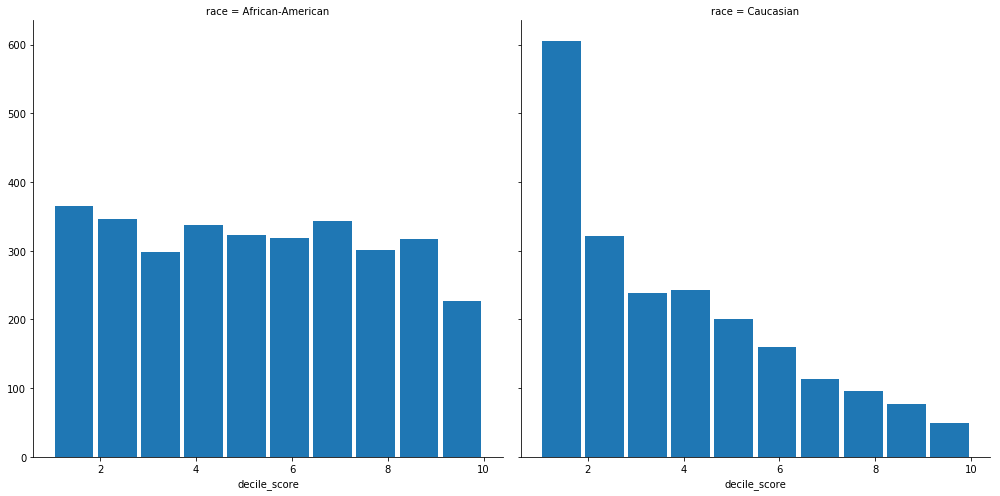

In [75]:
graph1 = sns.FacetGrid(ds_races_focus, col='race', height=7)
graph1.map(plt.hist, 'decile_score', rwidth=0.9)

C:\ArquivosDeProgramas\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
C:\ArquivosDeProgramas\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


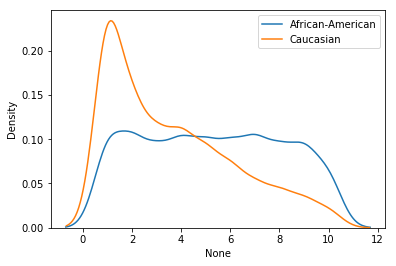

In [48]:
distplot_by(ds_races_focus['decile_score'], ds_races_focus['race'], hist=False)

In [108]:
from sklearn.metrics import accuracy_score, precision_score

# tabela cruzada da previsão e rótulos
y_true = ds_races_focus['event']
y_pred = ds_races_focus['y_pred'].replace(True, 1).replace(False, 0)

print(pd.crosstab(y_true, y_pred), '\n')

#cálculo de acurácia e precisão
print(f'Accuracy: {accuracy_score(y_true, y_pred)*100:.5} %')
print(f'Precision: {precision_score(y_true, y_pred)*100:.5} %')

y_pred     0     1
event             
0       1938  1217
1        815  1308 

Accuracy: 61.501 %
Precision: 51.802 %
